In [502]:
# necessary imports
import numpy as np
from numpy import random
import scipy
from scipy import special
import matplotlib.pyplot as plt

In [503]:
# given the number of availible non-negative integer positions
# and the positions of the players, this returns the payoffs of 
# all players according to their index on the position vector
def payoffs(npl, positions):
    res = np.zeros(len(positions))
    for i in range(len(positions)):     # loops though each player
        p = positions[i]                # player position
        po = np.delete(positions, i)
        do = np.zeros(len(po))          # relative distances of opponents
        for j in range(len(po)):        # loops through opponents
            do[j] = po[j]-p             # finds relative distances
        inc = len(do)-np.count_nonzero(do)    # number of opponents at same position
        db = do[np.where(do < 0, do, -np.inf).argmax()] # distance of nearest opponent below        
        da = do[np.where(do > 0, do, np.inf).argmin()]  # distance of nearest opponent above
        if db == 0 and da == 0:         # case where all players at the same point
            res=npl/len(res)*np.ones(len(res))
            break
        if db >= 0:                     # case where no other players are above
            res[i] += (p+da/2)/(inc+1)
        elif da <= 0:                   # case where no other players are below
            res[i] += ((npl-p)+abs(db)/2)/(inc+1)            
        else:                           # case where other players are above and below 
            res[i] += (abs(db)+da)/2/(inc+1)
    return res

In [504]:
# given a specific player index, the number of positions, and the
# positions of other players, this returns the position that,
# all else equal, maximizes the payoff for the player
def payoffmax(p, npl, positions):
    payoffv = np.zeros(npl+1)
    for i in range(len(payoffv)):
        pos = positions
        pos[p] = i
        ps = payoffs(npl, pos)
        payoffv[i]=ps[p]
    return np.argmax(payoffv)

The two cells below determine and plot 1D Hotelling trajectories in a case where one player is randomly chosen to move optimally

In [505]:
nplay = 10    # number of players
nplac = 200   # number of non-negative integer positions availible
rplay = 1000  # number of rounds played
#positions= np.random.randint(nplac+1)*np.ones(nplay)     # case where all players start at the same random position
positions=np.random.randint(nplac+1, size=nplay)         # case where players start at random positions
p = np.zeros((nplay,rplay))
for i in range(len(p[0,:])):  # loops over rounds
    print (round(i/len(p[0,:])*100,3),"% complete", end='\r')  # prints percent completion
    ri = np.random.randint(nplay)                              # randomply chooses player to move
    positions[ri]=payoffmax(ri, nplac, positions)              # finds best position for player to move
    p[:,i] = positions                                         # updates trajectory value

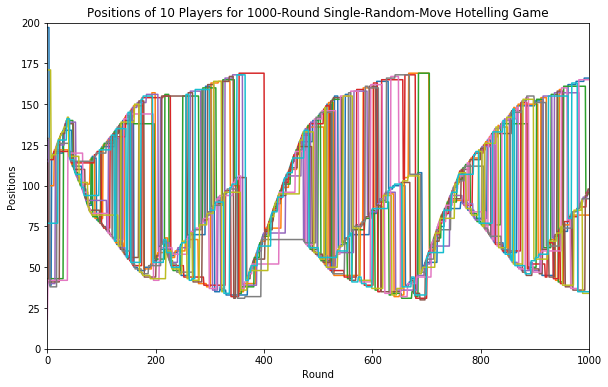

In [507]:
# plots the movement trajectories of all players
fig, ax = plt.subplots(figsize=(9.71,6))
ax = plt.subplot(111)
ax.set_ylim(0, nplac)
ax.set_xlim(0, rplay)
ax.set_title('Positions of '+str(nplay)+' Players for '+str(rplay)+'-Round Single-Random-Move Hotelling Game')
ax.set_xlabel('Round')
ax.set_ylabel('Positions')
for i in range(nplay):
    plt.plot(p[i,:])

The two cells below determine and plot 1D Hotelling trajectories in a case where all players simultaneously move optimally

In [528]:
nplay = 10    # number of players
nplac = 200   # number of non-negative integer positions availible
rplay = 200  # number of rounds played
#positions= np.random.randint(nplac+1)*np.ones(nplay)     # case where all players start at the same random position
positions=np.random.randint(nplac+1, size=nplay)         # case where players start at random positions
p = np.zeros((nplay,rplay))
for i in range(len(p[0,:])):  # loops over rounds
    print (round(i/len(p[0,:])*100,3),"% complete", end='\r')  # prints percent completion
    for j in range(nplay):
        positions[j]=payoffmax(j, nplac, positions)            # moves all players to their optimal positions
    p[:,i] = positions 

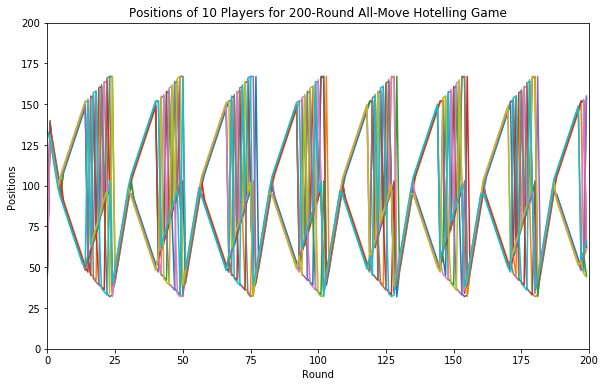

In [532]:
# plots the movement trajectories of all players
fig, ax = plt.subplots(figsize=(9.71,6))
ax = plt.subplot(111)
ax.set_ylim(0, nplac)
ax.set_xlim(0, rplay)
ax.set_title('Positions of '+str(nplay)+' Players for '+str(rplay)+'-Round All-Move Hotelling Game')
ax.set_xlabel('Round')
ax.set_ylabel('Positions')
for i in range(nplay):
    plt.plot(p[i,:])

The two cells below determine and plot 1D Hotelling trajectories in a case where all players simultaneously move one step toward the optimal direction

In [566]:
nplay = 10    # number of players
nplac = 100   # number of non-negative integer positions availible
rplay = 200  # number of rounds played
#positions= np.random.randint(nplac+1)*np.ones(nplay)     # case where all players start at the same random position
positions=np.random.randint(nplac+1, size=nplay)         # case where players start at random positions
p = np.zeros((nplay,rplay))
for i in range(len(p[0,:])):  # loops over rounds
    print (round(i/len(p[0,:])*100,3),"% complete", end='\r')  # prints percent completion
    for j in range(nplay):
        positions[j] -= np.sign(positions[j]-payoffmax(j, nplac, positions))  # moves all players one step toward best position
    p[:,i] = positions 

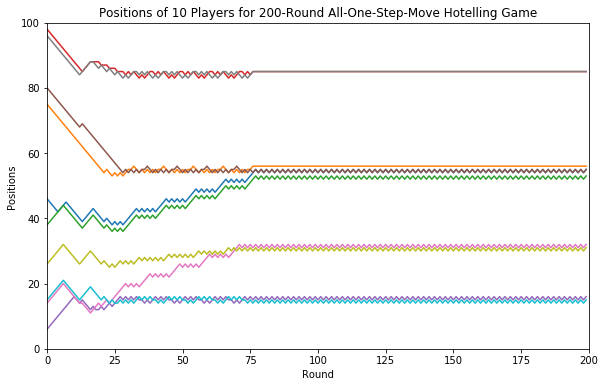

In [568]:
# plots the movement trajectories of all players
fig, ax = plt.subplots(figsize=(9.71,6))
ax = plt.subplot(111)
ax.set_ylim(0, nplac)
ax.set_xlim(0, rplay)
ax.set_title('Positions of '+str(nplay)+' Players for '+str(rplay)+'-Round All-One-Step-Move Hotelling Game')
ax.set_xlabel('Round')
ax.set_ylabel('Positions')
for i in range(nplay):
    plt.plot(p[i,:])